In [1]:
import tensorflow as tf
from tensorflow.keras import layers, losses, metrics, optimizers, callbacks
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score
from imblearn.metrics import classification_report_imbalanced

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

import seaborn as sns
import matplotlib.pyplot as plt
import requests
import numpy as np

import joblib

In [2]:
np.random.seed(42)

## Reading the dataset

In [3]:
df = (
    pd.read_csv("./DryBeanDataset/Dry_Bean_Dataset.csv")
    .sample(frac=1)
    .reset_index(drop=True)
)

In [4]:
df.head(10)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,42339,741.226,260.199330,207.306394,1.255144,0.604347,42676,232.180294,0.771202,0.992103,0.968387,0.892317,0.006146,0.002403,0.796230,0.999383,SEKER
1,68247,1088.754,370.368146,237.863792,1.557060,0.766507,70172,294.779204,0.767683,0.972567,0.723492,0.795909,0.005427,0.001343,0.633471,0.986352,BARBUNYA
2,37856,708.716,248.430330,194.360324,1.278195,0.622835,38232,219.544429,0.744640,0.990165,0.947109,0.883726,0.006563,0.002469,0.780972,0.998235,SEKER
3,33143,648.385,222.526309,189.737379,1.172812,0.522480,33377,205.423899,0.769980,0.992989,0.990685,0.923144,0.006714,0.003008,0.852195,0.999465,SEKER
4,29925,647.570,237.714031,161.004849,1.476440,0.735703,30321,195.196551,0.785309,0.986940,0.896748,0.821140,0.007944,0.002228,0.674271,0.995521,DERMASON
5,38489,707.978,244.119399,200.950084,1.214826,0.567805,38782,221.372349,0.788871,0.992445,0.964955,0.906820,0.006343,0.002646,0.822322,0.998979,SEKER
6,89592,1155.357,452.291405,254.964533,1.773939,0.825968,90627,337.745581,0.795772,0.988580,0.843425,0.746743,0.005048,0.000968,0.557626,0.989193,CALI
7,42379,759.965,251.037567,215.217912,1.166434,0.514795,42840,232.289945,0.763586,0.989239,0.922090,0.925319,0.005924,0.002679,0.856216,0.998720,SEKER
8,203536,1735.247,648.157318,401.698875,1.613540,0.784795,206049,509.067858,0.774879,0.987804,0.849432,0.785408,0.003184,0.000747,0.616866,0.995337,BOMBAY
9,27306,608.784,225.492411,154.595717,1.458594,0.727986,27648,186.459323,0.801491,0.987630,0.925852,0.826898,0.008258,0.002382,0.683761,0.997330,DERMASON


## Creating the model

In [5]:
net = tf.keras.Sequential(
    [
        layers.Dense(512, activation="relu"),
        layers.Dense(256, activation="relu"),
        layers.Dense(7),
    ]
)

In [6]:
X = df.drop(columns=["Class"])
y = df.Class.astype('category').cat.codes

### Without Resampling

In [7]:
# scaling the the data for training!
scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

X_train = scaler.fit_transform(X_train)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)

In [8]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32)
val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(16)

In [9]:
net.compile(
    optimizer=optimizers.Adam(learning_rate=3e-4),
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[metrics.SparseCategoricalAccuracy()],
)

In [10]:
history = net.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=[
        callbacks.ModelCheckpoint("models/4", save_best_only=True, verbose=3),
    ],
)

Epoch 1/30
233/240 [============================>.] - ETA: 0s - loss: 0.5038 - sparse_categorical_accuracy: 0.8513
Epoch 00001: val_loss improved from inf to 0.24559, saving model to models\4
INFO:tensorflow:Assets written to: models\4\assets
240/240 [==============================] - 2s 7ms/step - loss: 0.4963 - sparse_categorical_accuracy: 0.8533 - val_loss: 0.2456 - val_sparse_categorical_accuracy: 0.9197
Epoch 2/30
240/240 [==============================] - ETA: 0s - loss: 0.2318 - sparse_categorical_accuracy: 0.9146
Epoch 00002: val_loss improved from 0.24559 to 0.21529, saving model to models\4
INFO:tensorflow:Assets written to: models\4\assets
240/240 [==============================] - 1s 6ms/step - loss: 0.2318 - sparse_categorical_accuracy: 0.9146 - val_loss: 0.2153 - val_sparse_categorical_accuracy: 0.9244
Epoch 3/30
230/240 [===========================>..] - ETA: 0s - loss: 0.2134 - sparse_categorical_accuracy: 0.9192
Epoch 00003: val_loss improved from 0.21529 to 0.20792, s

Epoch 21/30
238/240 [============================>.] - ETA: 0s - loss: 0.1747 - sparse_categorical_accuracy: 0.9329
Epoch 00021: val_loss improved from 0.20001 to 0.19970, saving model to models\4
INFO:tensorflow:Assets written to: models\4\assets
240/240 [==============================] - 2s 7ms/step - loss: 0.1748 - sparse_categorical_accuracy: 0.9327 - val_loss: 0.1997 - val_sparse_categorical_accuracy: 0.9263
Epoch 22/30
228/240 [===========================>..] - ETA: 0s - loss: 0.1745 - sparse_categorical_accuracy: 0.9328
Epoch 00022: val_loss improved from 0.19970 to 0.19944, saving model to models\4
INFO:tensorflow:Assets written to: models\4\assets
240/240 [==============================] - 2s 8ms/step - loss: 0.1739 - sparse_categorical_accuracy: 0.9335 - val_loss: 0.1994 - val_sparse_categorical_accuracy: 0.9259
Epoch 23/30
240/240 [==============================] - ETA: 0s - loss: 0.1729 - sparse_categorical_accuracy: 0.9334
Epoch 00023: val_loss improved from 0.19944 to 0.1

In [11]:
# Transforming the test set

X_test = scaler.transform(X_test)

test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(16)

In [12]:
net.evaluate(test_ds)

213/213 [==============================] - 0s 2ms/step - loss: 0.1857 - sparse_categorical_accuracy: 0.9336


[0.18566052615642548, 0.9335880279541016]

In [13]:
preds = net(X_test)
preds = tf.argmax(preds, axis=1)

In [14]:
preds.numpy()

array([0, 3, 0, ..., 6, 2, 0], dtype=int64)

In [15]:
f1_score(y_true=y_test, y_pred=preds.numpy(), average='weighted')

0.9339398450491823

In [16]:
cf = confusion_matrix(y_test, preds)

classes = df.Class.astype("category").cat.categories.tolist()
print(classification_report_imbalanced(y_test, preds, target_names=classes))

                   pre       rec       spe        f1       geo       iba       sup

   BARBUNYA       0.94      0.95      0.99      0.94      0.97      0.93       331
     BOMBAY       1.00      1.00      1.00      1.00      1.00      1.00       135
       CALI       0.98      0.92      1.00      0.95      0.96      0.91       416
   DERMASON       0.95      0.90      0.98      0.93      0.94      0.88       902
      HOROZ       0.95      0.96      0.99      0.95      0.98      0.95       482
      SEKER       0.95      0.96      0.99      0.95      0.97      0.95       504
       SIRA       0.85      0.92      0.96      0.89      0.94      0.89       633

avg / total       0.94      0.93      0.98      0.93      0.96      0.91      3403



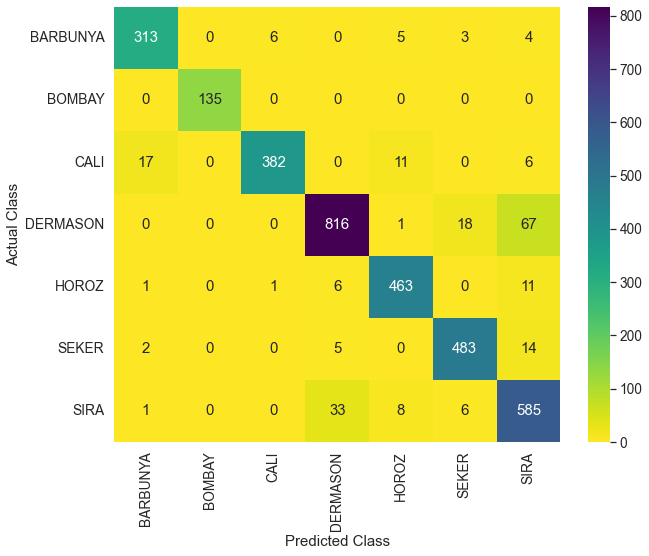

In [17]:
classes = df.Class.astype("category").cat.categories.tolist()
sns.set(rc={"figure.figsize": (10, 8)}, font_scale=1.25)
ax = sns.heatmap(
    cf, annot=True, xticklabels=classes, yticklabels=classes, fmt="d", cmap="viridis_r"
)
ax.set_ylabel("Actual Class")
_ = ax.set_xlabel("Predicted Class")

### With SMOTE Oversampling

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [19]:
X_test.to_csv("./test_files/full_feats_test.csv", index=False)

In [20]:
X_train_sampled, y_train_sampled = SMOTE().fit_resample(X_train, y_train) 

In [21]:
scaler = StandardScaler()

X_train_sampled = scaler.fit_transform(X_train_sampled)

X_train, X_val, y_train, y_val = train_test_split(X_train_sampled, y_train_sampled, test_size=0.25)

In [22]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32)
val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(16)

In [23]:
history = net.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=[
        callbacks.ModelCheckpoint("models/5", save_best_only=True, verbose=3),
    ],
)

Epoch 1/30
431/433 [============================>.] - ETA: 0s - loss: 0.1512 - sparse_categorical_accuracy: 0.9454
Epoch 00001: val_loss improved from inf to 0.13347, saving model to models\5
INFO:tensorflow:Assets written to: models\5\assets
433/433 [==============================] - 3s 7ms/step - loss: 0.1514 - sparse_categorical_accuracy: 0.9454 - val_loss: 0.1335 - val_sparse_categorical_accuracy: 0.9479
Epoch 2/30
427/433 [============================>.] - ETA: 0s - loss: 0.1300 - sparse_categorical_accuracy: 0.9521
Epoch 00002: val_loss improved from 0.13347 to 0.13186, saving model to models\5
INFO:tensorflow:Assets written to: models\5\assets
433/433 [==============================] - 4s 8ms/step - loss: 0.1298 - sparse_categorical_accuracy: 0.9522 - val_loss: 0.1319 - val_sparse_categorical_accuracy: 0.9490
Epoch 3/30
424/433 [============================>.] - ETA: 0s - loss: 0.1267 - sparse_categorical_accuracy: 0.9526
Epoch 00003: val_loss improved from 0.13186 to 0.13097, s

Epoch 22/30
432/433 [============================>.] - ETA: 0s - loss: 0.1078 - sparse_categorical_accuracy: 0.9606
Epoch 00022: val_loss improved from 0.12928 to 0.12921, saving model to models\5
INFO:tensorflow:Assets written to: models\5\assets
433/433 [==============================] - 2s 6ms/step - loss: 0.1078 - sparse_categorical_accuracy: 0.9606 - val_loss: 0.1292 - val_sparse_categorical_accuracy: 0.9514
Epoch 23/30
423/433 [============================>.] - ETA: 0s - loss: 0.1073 - sparse_categorical_accuracy: 0.9603
Epoch 00023: val_loss improved from 0.12921 to 0.12914, saving model to models\5
INFO:tensorflow:Assets written to: models\5\assets
433/433 [==============================] - 3s 6ms/step - loss: 0.1071 - sparse_categorical_accuracy: 0.9607 - val_loss: 0.1291 - val_sparse_categorical_accuracy: 0.9514
Epoch 24/30
421/433 [============================>.] - ETA: 0s - loss: 0.1064 - sparse_categorical_accuracy: 0.9607
Epoch 00024: val_loss did not improve from 0.12914

In [24]:
X_test = scaler.transform(X_test)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(16)
net.evaluate(test_ds)

213/213 [==============================] - 1s 2ms/step - loss: 0.1986 - sparse_categorical_accuracy: 0.9304


[0.19860129058361053, 0.9303555488586426]

In [25]:
preds = net(X_test)
preds = tf.argmax(preds, axis=1)
preds.numpy()

array([5, 3, 3, ..., 3, 6, 4], dtype=int64)

In [26]:
idx2class = {
    0: "BARBUNYA",
    1: "BOMBAY",
    2: "CALI",
    3: "DERMASON",
    4: "HOROZ",
    5: "SEKER",
    6: "SIRA",
}

In [27]:
f1_score(y_test, preds, average='weighted')

0.9304004472599166

In [28]:
print(classification_report_imbalanced(y_test, preds))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.91      0.99      0.93      0.95      0.90       318
          1       1.00      1.00      1.00      1.00      1.00      1.00       127
          2       0.94      0.97      0.99      0.95      0.98      0.96       389
          3       0.90      0.94      0.96      0.92      0.95      0.90       912
          4       0.97      0.95      0.99      0.96      0.97      0.94       476
          5       0.97      0.94      1.00      0.95      0.97      0.93       482
          6       0.89      0.87      0.97      0.88      0.92      0.84       699

avg / total       0.93      0.93      0.98      0.93      0.96      0.91      3403



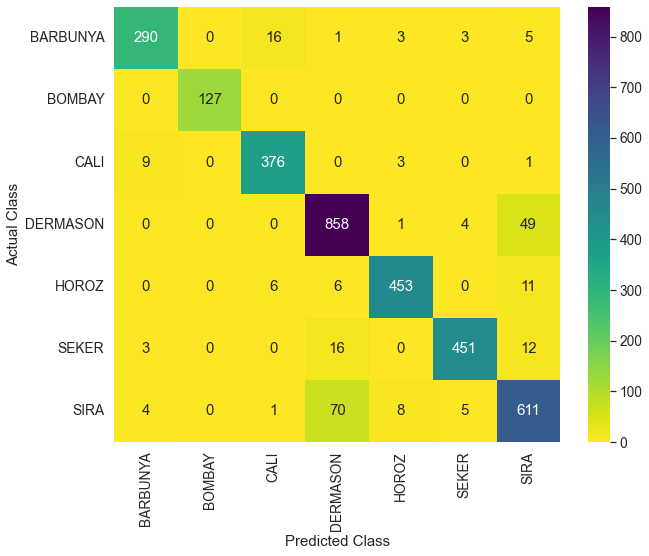

In [29]:
cf = confusion_matrix(y_test, preds)

classes = df.Class.astype("category").cat.categories.tolist()
sns.set(rc={"figure.figsize": (10, 8)}, font_scale=1.25)
ax = sns.heatmap(
    cf, annot=True, xticklabels=classes, yticklabels=classes, fmt="d", cmap="viridis_r"
)
ax.set_ylabel("Actual Class")
_ = ax.set_xlabel("Predicted Class")

In [30]:
joblib.dump(scaler, filename='./ML_models/NN_scaler.scaler')

['./ML_models/NN_scaler.scaler']

In [31]:
test_df = pd.read_csv("./test_files/full_feats_test.csv")

In [32]:
test_df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,40000,727.877,246.699162,206.888462,1.192426,0.544707,40425,225.675833,0.755858,0.989487,0.948755,0.914782,0.006167,0.002664,0.836825,0.997852
1,23689,575.638,205.967800,146.747501,1.403552,0.701695,24018,173.671447,0.765272,0.986302,0.898375,0.843197,0.008695,0.002711,0.710981,0.997899
2,31426,651.033,241.522589,166.167758,1.453486,0.725710,31760,200.032062,0.734578,0.989484,0.931736,0.828213,0.007685,0.002231,0.685936,0.996999
3,71826,1033.615,399.283078,230.561523,1.731785,0.816434,72664,302.409827,0.737744,0.988467,0.844839,0.757382,0.005559,0.001128,0.573628,0.993400
4,62296,970.321,376.031819,211.968931,1.773995,0.825980,63057,281.634037,0.811178,0.987932,0.831456,0.748963,0.006036,0.001172,0.560946,0.995115


In [33]:
y_test[:5]

13123    5
8100     3
5692     3
708      2
2241     2
dtype: int8